# Wybór funkcji aktywacji

## Pobranie danych z pliku

In [6]:
import numpy as np

file_name = "creditcard.csv"
file = open(file_name)
file.readline()  # skip the header
data = np.loadtxt(file, delimiter=',')

## Wydzielenie zbiorów

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data[:, :30], data[:, 30:], random_state=0)
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

## Resampling klas

In [8]:
from imblearn.over_sampling import SMOTE

X_train, Y_train = SMOTE(sampling_strategy=0.85).fit_resample(X_train, Y_train)

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Inicjacja struktur danych do testów

In [9]:
scores_false_negative = []
scores_false_positive = []
methods = []

## Wybór funkcji aktywacji

### Identity(funkcja liniowa)

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import time
from sklearn.feature_selection import SelectKBest, f_classif

pipeline = make_pipeline(StandardScaler(), SelectKBest(score_func=f_classif, k=10), MLPClassifier(activation='identity'))
start = time.time()
pipeline.fit(X_train, Y_train)
end = time.time()
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
scores_false_positive.append(cm[0, 1])
scores_false_negative.append(cm[1, 0])
print(cm)
methods.append("identity")

[[70387   695]
 [   14   106]]


c:\program files\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Logistic sigmoid

In [11]:
pipeline = make_pipeline(StandardScaler(), SelectKBest(score_func=f_classif, k=10), MLPClassifier(activation='logistic'))
start = time.time()
pipeline.fit(X_train, Y_train)
end = time.time()
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
scores_false_positive.append(cm[0, 1])
scores_false_negative.append(cm[1, 0])
print(cm)
methods.append("logistic")

[[70796   286]
 [   17   103]]


### Tangens hiperboliczny

In [12]:
pipeline = make_pipeline(StandardScaler(), SelectKBest(score_func=f_classif, k=10), MLPClassifier(activation='tanh'))
start = time.time()
pipeline.fit(X_train, Y_train)
end = time.time()
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
scores_false_positive.append(cm[0, 1])
scores_false_negative.append(cm[1, 0])
print(cm)
methods.append("tanh")

[[70901   181]
 [   18   102]]


### relu

In [13]:
pipeline = make_pipeline(StandardScaler(), SelectKBest(score_func=f_classif, k=10), MLPClassifier(activation='relu'))
start = time.time()
pipeline.fit(X_train, Y_train)
end = time.time()
cm = confusion_matrix(Y_test, pipeline.predict(X_test))
scores_false_positive.append(cm[0, 1])
scores_false_negative.append(cm[1, 0])
print(cm)
methods.append("relu")

[[70954   128]
 [   19   101]]


## Wyniki

### False negative

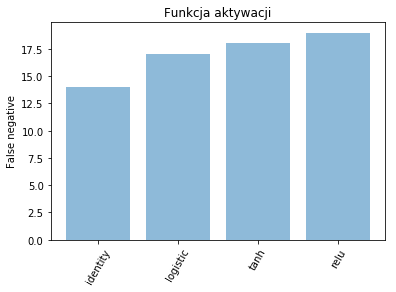

In [16]:
import matplotlib.pyplot as plt

plt.bar(np.arange(len(methods)), scores_false_negative, align='center', alpha=0.5)
plt.xticks(np.arange(len(methods)), methods, rotation = 60)
plt.ylabel('False negative')
plt.title('Funkcja aktywacji')

plt.show()

### False positive

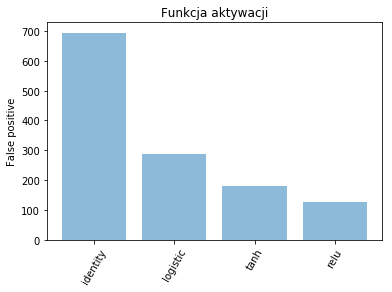

In [17]:
plt.bar(np.arange(len(methods)), scores_false_positive, align='center', alpha=0.5)
plt.xticks(np.arange(len(methods)), methods, rotation = 60)
plt.ylabel('False positive')
plt.title('Funkcja aktywacji')

plt.show()